In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import svm

In [3]:
# Assigning the name of the column in the form of 'list'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Importing the dataset in the variable 'df' and assigning the column names as specified above
df= pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Viewing the top 5 values of the dataset
df.head()

# in order to view bottom 5 entries, we can do
#df.tail()

#in order to view more than 5 entries, we can enter any integer value into '()'.
#Ex: df.head(10) or df.tail(15), etc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Now let us check for the shape of the dataset and also that are any null values present in our dataset.
# For that,

print('shape of the dataset=', df.shape)

print(' \nThe null count of each column of the dataset are as follows:')
df.isnull().sum()

shape of the dataset= (506, 14)
 
The null count of each column of the dataset are as follows:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Here, we can observe that there are 506 rows and 14 columns in the dataset. Also, that there are no null values present in the dataset.

In [5]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)

Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Datatypes of all the columns:


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Detect outliers in the continuous columns



In [6]:
# Function to detect outliers in every feature
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


#### Observations :
- As per the IQR methodology, there are outliers in majority of the columns.
- In the further steps below, we will see how to deal with the outliers.

## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

In [37]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)


Histograms



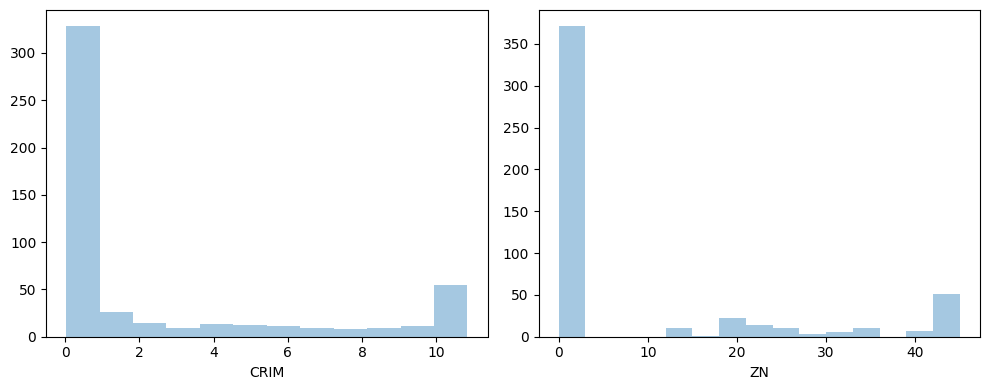

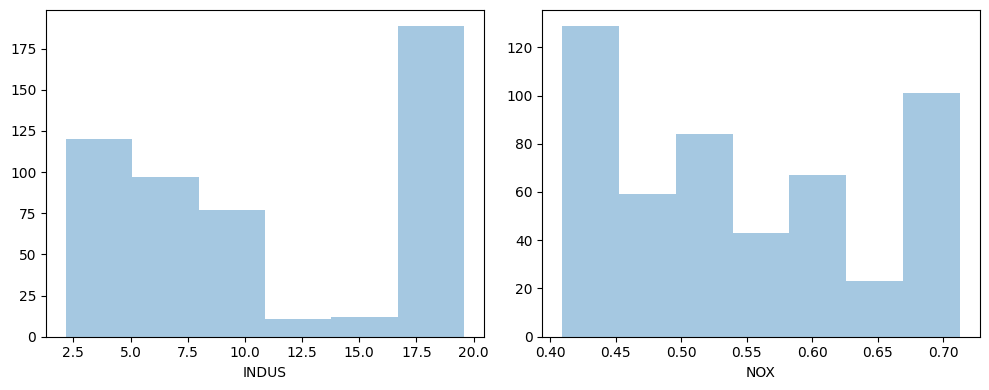

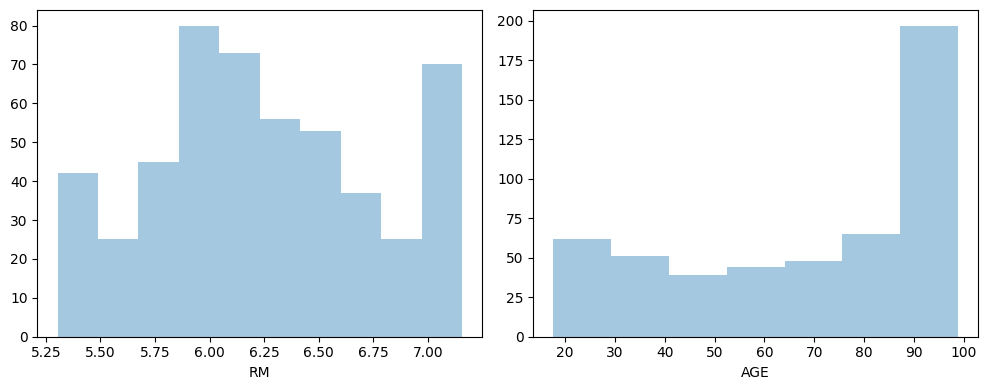

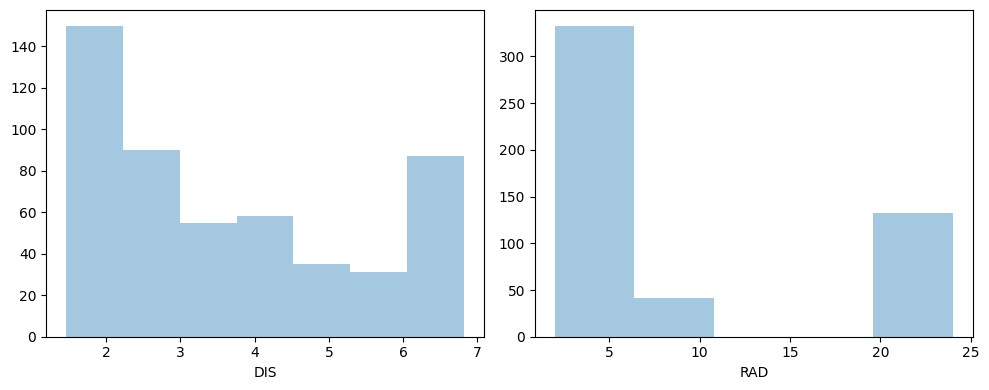

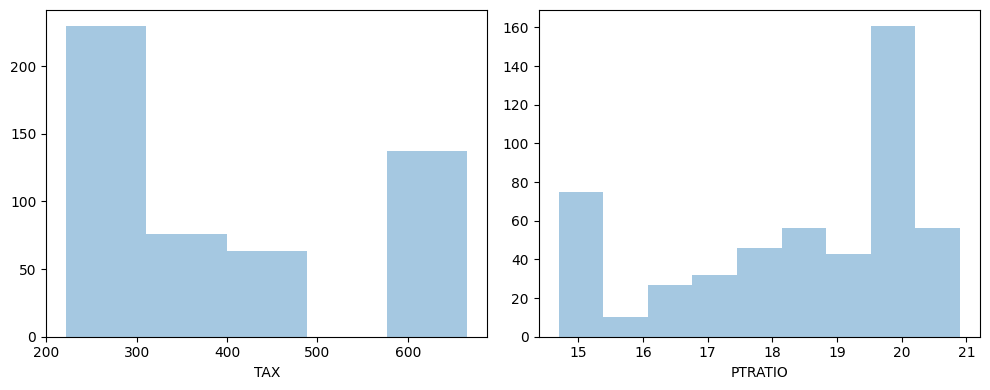

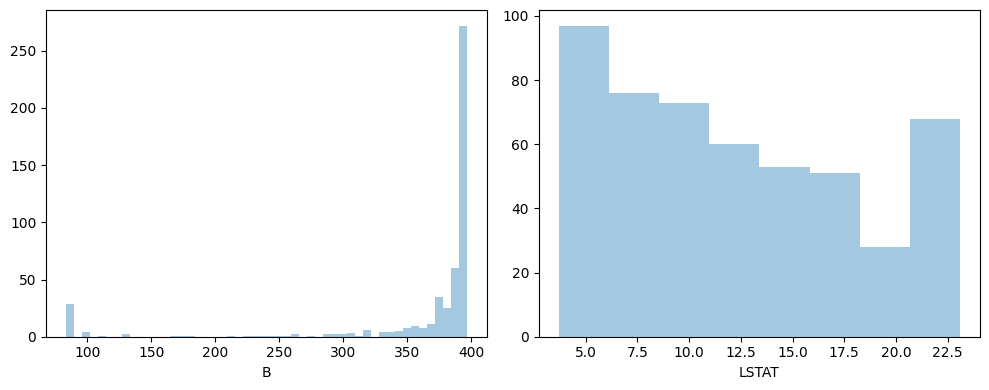


Box Plots



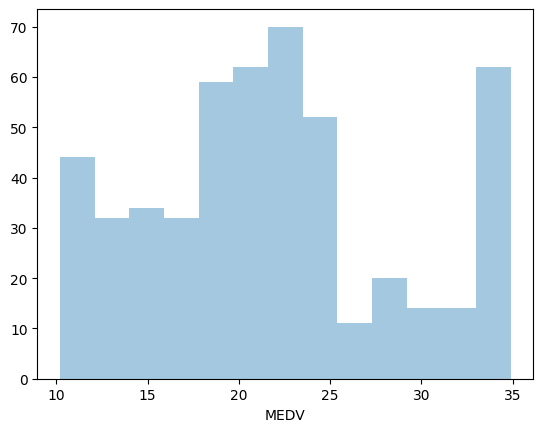

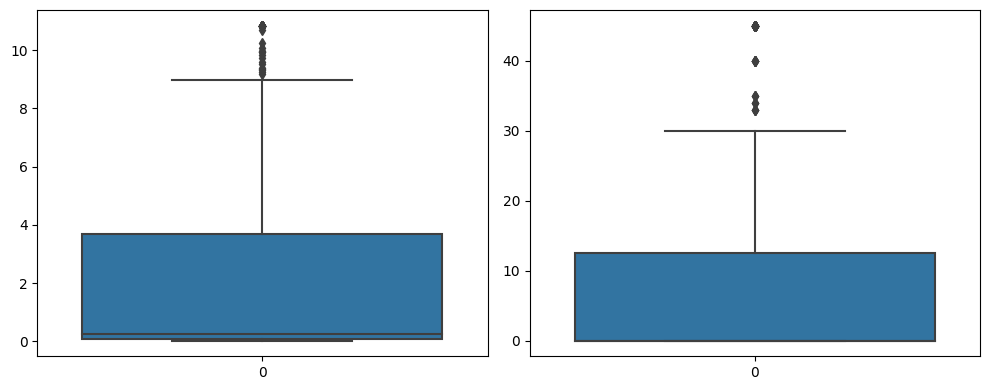

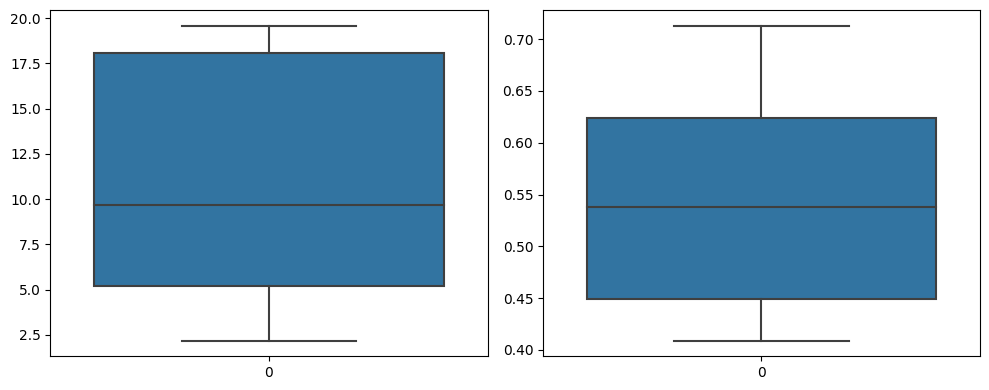

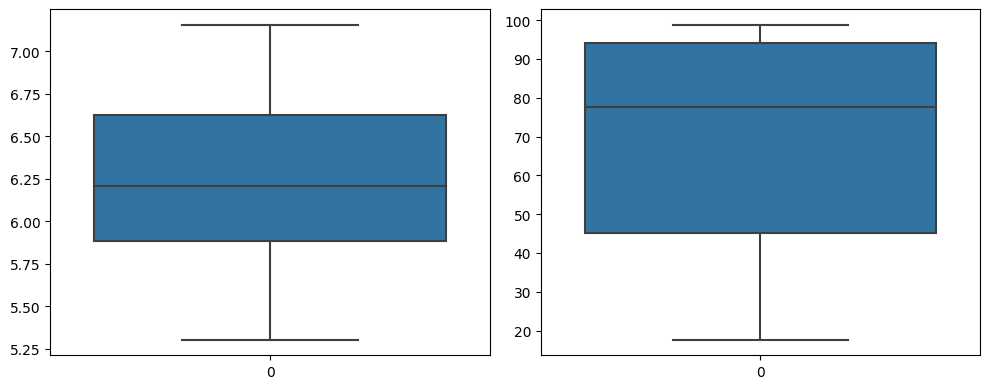

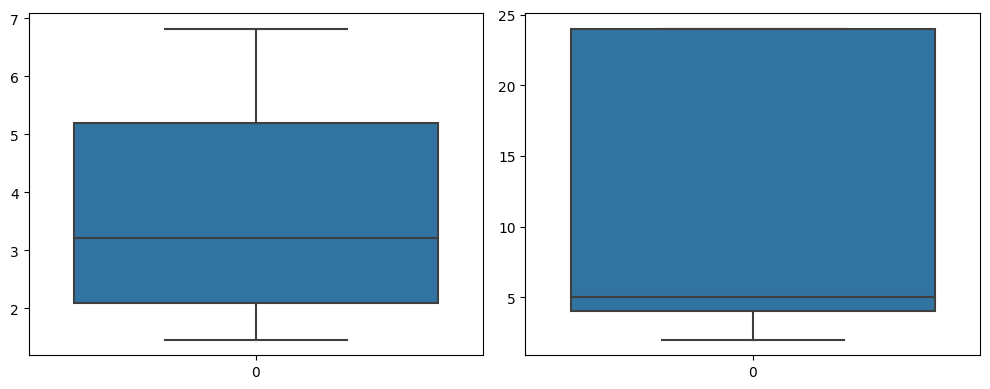

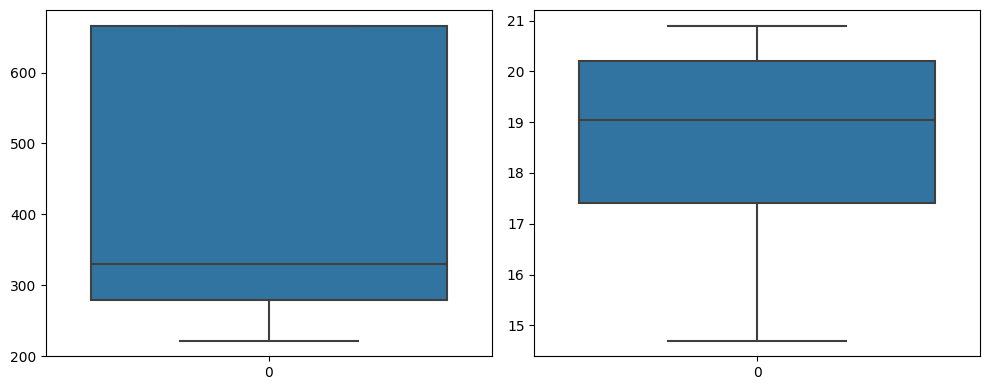

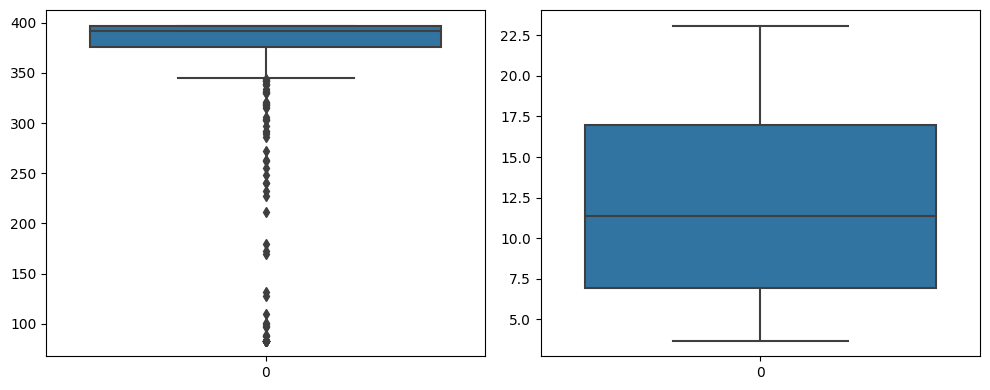

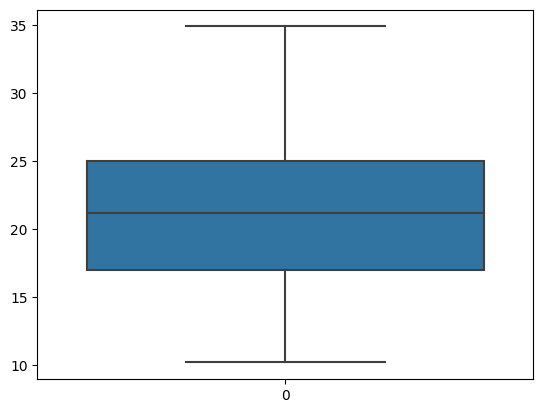

In [38]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]

    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])



print("Histograms\n")
plot_continuous_columns(df)

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(df)

In [8]:
df.drop(['CHAS'],axis=1,inplace=True)

# Axis=1 means that the execution happens column wise. This means that column will be removed.
# Inplace=True means that the change is permanent.
# If we di inplace= false, then only in this parocular step, the column will be removed and in further steps, it will be back.

# Again viewing the dataset to see the change.
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
from scipy.stats.mstats import winsorize

# Function to treat outliers

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

    return dataframe


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,NOX,0
4,RM,0
5,AGE,0
6,DIS,0
7,RAD,0
8,TAX,0
9,PTRATIO,0


We can see that the outliers are removed. The outliers, shown above, in columns `CRIM`,`ZN` and `B` are actually not outliers. They are the majority values present in out dataset.

## Prediction of house Price

In [10]:
# Predictors
x = df.iloc[:,:-1]

# This means that we are using all the columns, except 'MEDV', to predict the house price


# Target
y = df.iloc[:,-1]

# This is because MEDV is the 'Median value of owner-occupied homes in $1000s'.
# This shows that this is what we need to predict. So we call it the target variable.

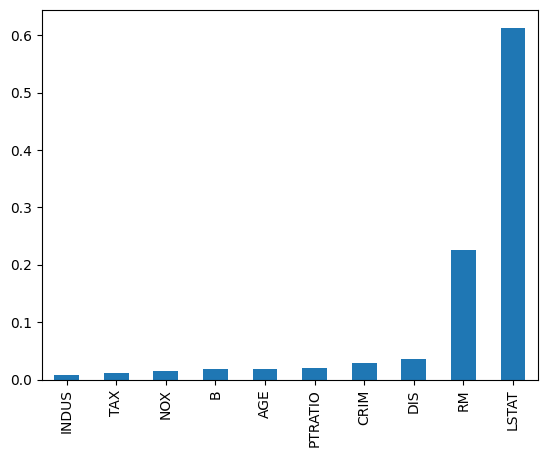

In [11]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(x,y)

#### Observation:

- We can see that the Important features are sorted in ascending order, along with their importance in the form of bar graph.
- We can clearly observe that `LSTAT`, `RM`, `DIS` and `CRIM` are the most important features that can be used for prediction.
- This means that we can ignore the other columns for the House price prediction.

In [12]:
x.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02763,18.0,2.31,0.538,6.575,65.2,4.0900,2,296.0,15.3,396.9,4.98
1,0.02763,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [13]:
# Modifying the Predictors to improve the effeciency of the model.

x= x[['CRIM','DIS','RM','LSTAT']]
x.head(2)

,CRIM,DIS,RM,LSTAT
0,0.02763,4.0900,6.575,4.98
1,0.02763,4.9671,6.421,9.14


#### Scaling the feature variables using `MinMaxScaler`

In [14]:
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

x.head()

,CRIM,DIS,RM,LSTAT
0,0.000000,0.490733,0.686656,0.066013
1,0.000000,0.654441,0.603458,0.280557
2,0.000000,0.654441,1.000000,0.017019
3,0.000439,0.858839,0.915181,0.000000
4,0.003833,0.858839,0.995678,0.084064


In [15]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

### 1. Linear Regression

In [16]:
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})
coefficients

,Attributes,Coefficients
0,CRIM,-3.877522
1,DIS,-2.6488
2,RM,7.640161
3,LSTAT,-13.810714


In [17]:
y_pred=lr.predict(xtrain)

#### Model Evaluation
- Training data

In [18]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2:  0.7642226556723264
Adusted R^2:  0.761520336539631
MAE:  2.7496074868748015
MSE:  12.146464209933594
RMSE:  3.4851777874211227


In [19]:
print(metrics.max_error(ytrain, y_pred))

13.607512374416219


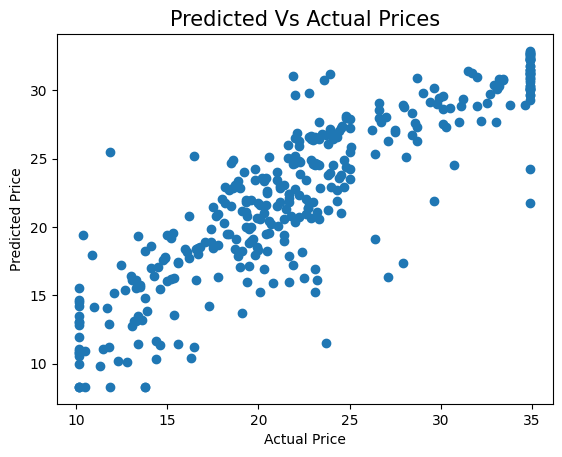

In [20]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test data

In [21]:
# Predicting the Test data with model
ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

R^2:  0.6997582362305645
Adusted R^2:  0.6915883923184711
MAE:  2.9529104957019086
MSE:  13.294449553609883
RMSE:  3.6461554483606267


In [22]:
print(metrics.max_error(ytest, ytest_pred))

12.579386511503579


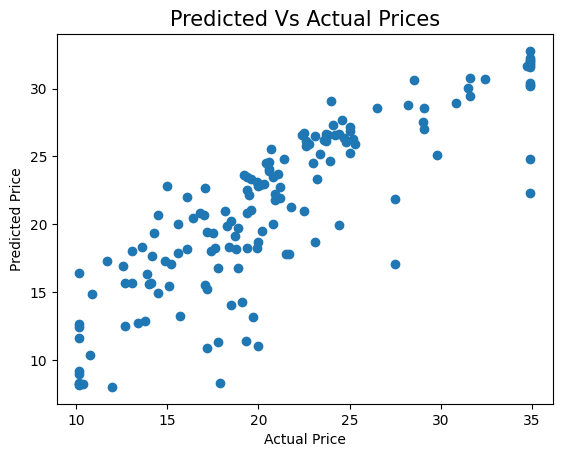

In [23]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

### 2. Random Forest

In [24]:
rfr= RandomForestRegressor()

rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [25]:
y_pred=rfr.predict(xtrain)

#### Model Evaluation
- Training data

In [26]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.9769734182188151
Adusted R^2:  0.9767095032413803
MAE:  0.778392231536507
MSE:  1.1862528703927018
RMSE:  1.089152363259017

Maximum Error:  5.489000000000047


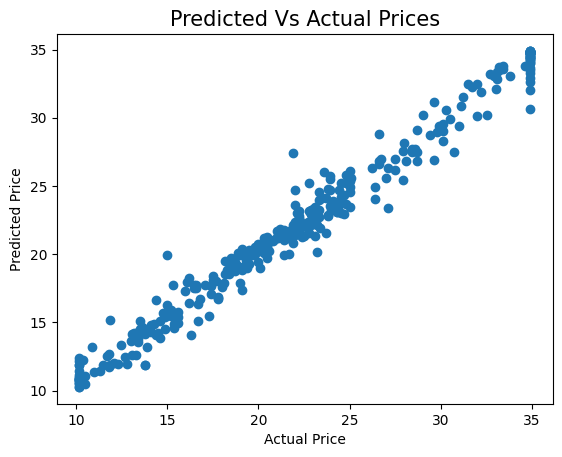

In [27]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test data

In [28]:
# Predicting the Test data with model
ytest_pred=rfr.predict(xtest)

rfr_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",rfr_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.7936173787967794
Adusted R^2:  0.7880015251585966
MAE:  1.9948116285030744
MSE:  9.138446670047529
RMSE:  3.0229863827095764

Maximum Error:  15.348999999999997


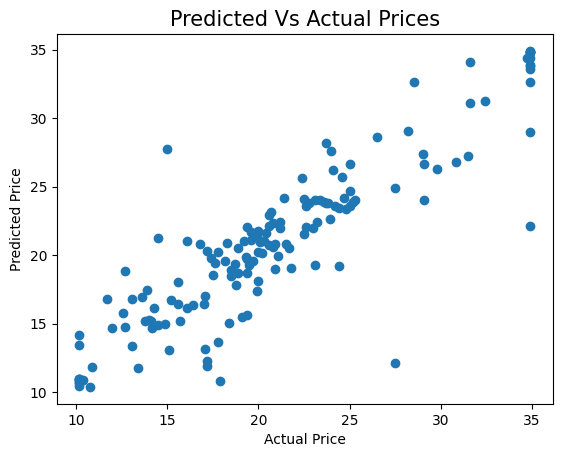

In [29]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

### 3. Support Vector Machine (SVM)

In [30]:
svm_reg=svm.SVR()
svm_reg.fit(xtrain, ytrain)

SVR()

In [31]:
y_pred=svm_reg.predict(xtrain)

#### Model Evaluation
- Training data

In [32]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.8309969913608581
Adusted R^2:  0.8290599941271717
MAE:  2.1579841631330376
MSE:  8.706472632729088
RMSE:  2.950673250756357

Maximum Error:  12.779908114045892


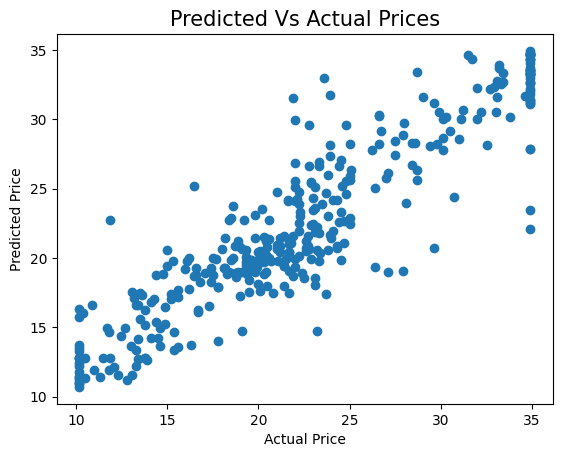

In [33]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test Data

In [34]:
# Predicting the Test data with model
ytest_pred=svm_reg.predict(xtest)

svm_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",svm_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.789952378737008
Adusted R^2:  0.7842367972060422
MAE:  2.219472671810215
MSE:  9.300729750845129
RMSE:  3.049709781412836

Maximum Error:  13.475185876404343


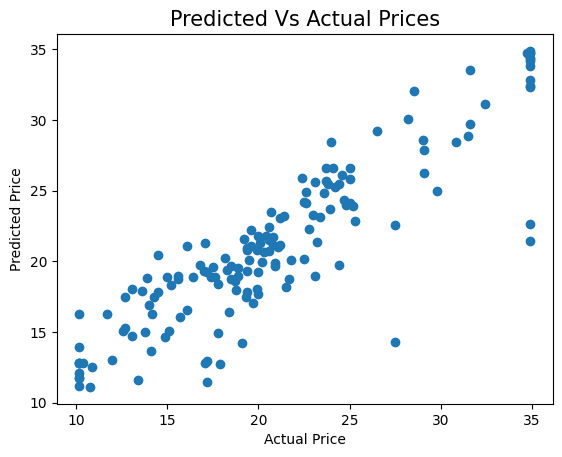

In [35]:
# visualizing the difference between the actual and predicted price

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

## Evaluation Comparison of all the 3 methods

**R-squared**

R-squared = (TSS-RSS)/TSS
- Explained variation/ Total variation
- 1 – Unexplained variation/ Total variation

A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa.
- If we had a really low RSS value, it would mean that the regression line was very close to the actual points.
- High RSS value, it would mean that the regression line was far away from the actual points.

In [36]:
models=pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'R_squared Score':[lin_acc*100, rfr_acc*100,svm_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)

,Model,R_squared Score
1,Random Forest,79.361738
2,Support Vector Machine,78.995238
0,Linear Regression,69.975824


#### Observations:
- We can see that thr R_squared value for `Linera regression` is the lowest and the `Random Forest` is the highest.
- It means that **Linear Regression** gives us better results on test data, when compared to the other 2 models.